# Deep Learning Citation Graph

In [60]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from links import links # all links to PDFs of papers

### 1. Define nodes, edges and metadata

In [61]:
offset = 0.5
nodes = {
    "Perceptron":   {"full_name": "Perceptron\n(1958)","author":"Rosenblatt1958", "year": 1958, "cites": 22900, "color": "lightcoral", "x":-offset},
    "Backprop":     {"full_name": "Backprop\n(1986)", "author": "Rumelhart1986",  "year": 1986, "cites": 68000, "color": "lightcoral", "x":0},
    "CNNs":         {"full_name": "CNNs\n(1998)", "author": "LeCun1998",    "year": 1998, "cites": 80000, "color": "lightcoral", "x":offset},
    "LSTM":         {"full_name": "LSTM\n(1997)", "author": "Hochreiter1997","year": 1997, "cites": 169000, "color": "lightcoral", "x":2*offset},
    "ImageNet" :    {"full_name": "Image\nNet", "author": "Deng2009",       "year": 2009, "cites": 90000, "color": "lightcoral", "x":offset},
    "ReLU":         {"full_name": "ReLU", "author": "Nair2010",             "year": 2010, "cites": 28000, "color": "lightgreen", "x":-offset},
    "Dropout":      {"full_name": "Dropout", "author": "Hinton2012",        "year": 2012, "cites": 60000, "color": "lightgreen", "x":-offset},
    "AlexNet":      {"full_name": "AlexNet", "author": "Krizhevsky2012",    "year": 2012, "cites": 184000, "color": "lightgreen", "x":0},
    "Adam":         {"full_name": "Adam", "author": "Kingma2014",           "year": 2014, "cites": 226000, "color": "lightgray", "x":-2*offset},
    "GANs":         {"full_name": "GANs", "author": "Goodfellow2014",       "year": 2014, "cites": 100000, "color": "mediumpurple", "x":2*offset},
    "BatchNorm":    {"full_name": "Batch&", "author": "Ioffe2015",          "year": 2015, "cites": 62000, "color": "pink", "x":0},
    "LayerNorm":    {"full_name": "Layer\nNorm", "author": "LeiBa2016",     "year": 2015.5,"cites": 16600, "color": "pink", "x":0},
    "ResNet":       {"full_name": "ResNet", "author": "He2016",             "year": 2016, "cites": 290000, "color": "lightskyblue", "x":offset},
    "YOLO":         {"full_name": "YOLO", "author": "Redmon2016",           "year": 2016, "cites": 68000, "color": "lightcyan", "x":-1.85*offset},
    "UNet":         {"full_name": "U-Net", "author": "Ronneberger",         "year": 2015, "cites": 121000, "color": "cornflowerblue", "x":1.61*offset},
    "Transformer":  {"full_name": "Transformer", "author": "Vaswani2017",   "year": 2017, "cites": 200000, "color": "gold", "x":0},
    "BERT":         {"full_name": "BERT", "author": "Devlin2018",           "year": 2018, "cites": 146000, "color": "sandybrown", "x":-offset},
    "GPT":          {"full_name": "GPT", "author": "Radford2018",           "year": 2018.15, "cites": 16000, "color": "peachpuff", "x":0},
    "GPT2":          {"full_name": "GPT-2", "author": "Radford2019",        "year": 2019, "cites": 18000, "color": "peachpuff", "x":0},
    "GPT3":         {"full_name": "GPT-3", "author": "Brown2020",           "year": 2020, "cites": 55000, "color": "peachpuff", "x":0},
    "Diffusion":    {"full_name": "Diffusion", "author": "Ho2020",          "year": 2020, "cites": 28000, "color": "plum", "x":2*offset},
    #"LatentDiffusion":{"full_name": "Latent\nDiffusion", "author": "Rombach2022","year": 2022, "cites": 25000, "color": "plum", "x":2*offset},
    "RAG":          {"full_name": "RAG", "author": "Lewis2020",             "year": 2020, "cites": 12000, "color": "darkkhaki", "x":-2*offset},
    "ScalingLaws":  {"full_name": "\nScaling\nLaws", "author": "Kaplan2020","year": 2020, "cites": 5000, "color": "tan", "x":-offset},
    "SimCLR":       {"full_name": "Sim\nCLR", "author": "Chen2020",         "year": 2020, "cites": 27000, "color": "lightsteelblue", "x":offset},
    "BYOL":       {"full_name": "\nBY\nOL", "author": "Grill2020",          "year": 2020, "cites": 10000, "color": "lightsteelblue", "x":1.5*offset},
    "CLIP":         {"full_name": "CLIP", "author": "Radford2021",          "year": 2021, "cites": 44000, "color": "hotpink", "x":offset},
    "InstructGPT":  {"full_name": "Instruct\nGPT", "author": "Ouyang2022",  "year": 2022, "cites": 20000, "color": "cornsilk", "x":0},
    #"DeepSeek":  {"full_name": "Deep\nSeek", "author": "DeepSeek2025",  "year": 2025, "cites": 5000, "color": "yellow", "x":0},

    # legend:
    "3k":           {"full_name": "3k", "author": "None",                   "year": 2023, "cites": 3000, "color":"white", "x":-1.25*offset},
    "30k":          {"full_name": "30k", "author": "None",                  "year": 2023, "cites": 30000, "color":"white", "x":-1.5*offset},
    "300k":         {"full_name": "300k", "author": "None",                 "year": 2023, "cites": 300000, "color":"white", "x":-2.05*offset},
}

out_edges = {
    "Perceptron": ["Backprop"],
    "Backprop": ["CNNs","ReLU","AlexNet","Dropout"],
    "CNNs": ["AlexNet", "YOLO", "Dropout", "Dropout"],
    "ImageNet": ["AlexNet", "YOLO", "SimCLR", "BYOL"],
    "ReLU": ["Dropout", "AlexNet", "GANs", "Transformer", "YOLO", "BatchNorm", "BYOL"],
    "AlexNet": ["ResNet", "GANs", "Adam", "UNet", "SimCLR", "CLIP", "ScalingLaws"],
    "Dropout": ["AlexNet", "Adam", "ResNet", "YOLO", "Transformer", "GPT3", "GANs", "BatchNorm", "InstructGPT"],
    "ResNet": ["CLIP", "Transformer", "SimCLR", "BYOL"],
    "UNet": ["Diffusion"],
    "Adam": ["ResNet", "Transformer", "BERT" , "Diffusion", "GPT", "GPT3", "ScalingLaws", "RAG"],
    "BatchNorm": ["ResNet", "Transformer", "Diffusion", "CLIP", "SimCLR", "BYOL"],
    "GANs": ["Diffusion", "SimCLR", "BYOL"],
    "LSTM": ["Transformer"],
    "Transformer": ["BERT", "GPT","GPT2","GPT3", "Diffusion", "ScalingLaws", "RAG", "CLIP"],
    "BERT": ["GPT2", "GPT3", "ScalingLaws", "RAG"],
    "ScalingLaws": ["GPT3"],
    "SimCLR" : ["CLIP", "BYOL"],
    "BYOL" : ["CLIP"],
    "GPT": ["BERT", "GPT2", "GPT3", "RAG"],
    "GPT2": ["GPT3", "RAG"],
    "GPT3": ["CLIP", "InstructGPT"],
}

edges = [(origin,out) for origin in out_edges for out in out_edges[origin]]


### 2. Build Graph

In [62]:
G = nx.DiGraph()
for nid, meta in nodes.items():
    G.add_node(nid, **meta)
G.add_edges_from(edges)

### 3. Compute sizes from citation counts

In [63]:
cites = nx.get_node_attributes(G, "cites")
max_cites = max(cites.values())
min_cites = min(cites.values())

def scale_size(c):
    """Scale citation count to node size (circle area)."""
    scale_cst = 1.8
    min_size, max_size = 50*scale_cst, 3000*scale_cst # 
    return min_size + (max_size - min_size)*((c-min_cites)/(max_cites-min_cites))#**0.5

node_sizes = [scale_size(cites[nid]) for nid in G.nodes()]

### 4. Time layout

In [64]:

years = [meta["year"] for meta in nodes.values()]
min_year, max_year = 2000, max(years)

# Map year → y-coordinate (top is early)
def year_to_height(year):
    if year < 2000:
        small_tilt = (2007-year)/50 # 50y look like 1y in the <2000 era
        return (max_year - 2007+small_tilt) / (max_year - min_year) * 10
    else:
        return (max_year - year) / (max_year - min_year) * 10
y_coords = {nid: year_to_height(nodes[nid]["year"]) for nid in nodes}

# Horizontal staggering by year
positions = {}
year_offsets = {}
for nid in nodes:
    yr = nodes[nid]["year"]
    positions[nid] = (nodes[nid]["x"], y_coords[nid])


### Draw Graph

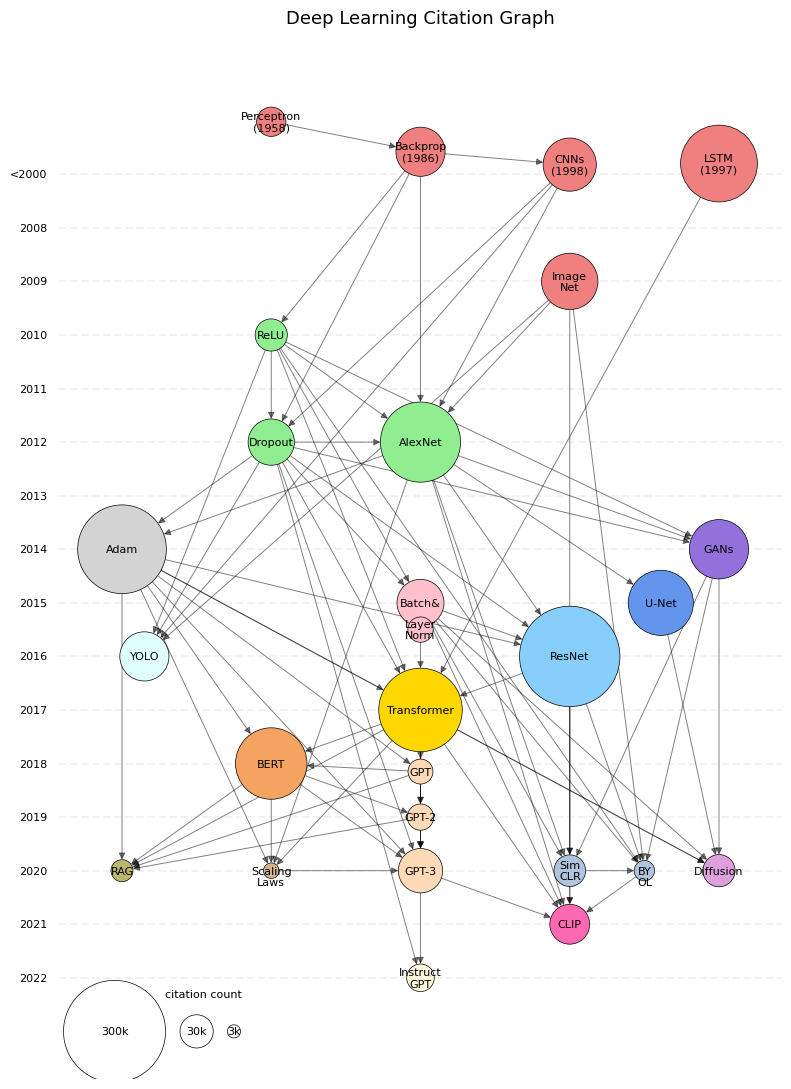

In [65]:
plt.figure(figsize=(8, 11))

# Add horizontal grid lines for years
for yr in range(2007,2023):#sorted(set(years)):
    y = (max_year - yr) / (max_year - min_year) * 10
    plt.axhline(y=y, color="gray", linestyle="--", alpha=0.1)
    plt.text(-2.5*offset, y, str(yr) if yr>2007 else "<2000", fontsize=8, va="center", ha="right")

nx.draw_networkx_nodes(G, positions, node_size=node_sizes, node_color=[nodes[nid]["color"]for nid in nodes], edgecolors="black", linewidths=0.5)
nx.draw_networkx_edges(G, positions, arrows=True, arrowstyle='-|>', node_size=node_sizes, arrowsize=10, width=0.7, alpha=0.5)
#nx.draw_networkx_labels(G, positions, labels={nid: nodes[nid]["full_name"] for nid in nodes}, font_size=8)
for i,nid in enumerate(nodes):
    posx, posy = positions[nid]
    plt.text(posx,posy, nodes[nid]["full_name"], fontsize=8, va="center", ha="center", url=links[nid])    

# legend
legend_y=2022.3
plt.text(-1.2*offset, (max_year-legend_y)/(max_year-min_year)*10,  "citation count", fontsize=8, va="center", ha="right")

plt.title("Deep Learning Citation Graph", fontsize=13)
plt.axis("off")
plt.tight_layout()
plt.savefig('./graph.pdf')#, dpi=1200)
plt.show()
